In [1]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bench = BenchmarkSet("lcbench", download = False, check=False)
bench.config.config['model'] = "new_model_noisy.onnx"

In [3]:
df = pd.read_csv(bench.config.get_path("test_dataset"))

In [4]:
def plot_true_lc(ccc):
    # Subset data to obtain learning curve for config
    config = pd.DataFrame(data = ccc, index = [0])
    config.drop(bench.config.fidelity_params, axis = 1, inplace=True)
    pdf = df.merge(config, on=list(config.columns.values))
    pdf = pdf.sort_values("epoch")
    plt.plot(pdf[bench.config.fidelity_params[0]], pdf[bench.config.y_names[1]], marker = "o")

In [5]:
def plot_lc_lcbench(ccc):
    ccc["OpenML_task_id"] = str(ccc["OpenML_task_id"])
    out = []
    for i in range(51):
        val = ccc.copy()
        val.update({"epoch" : i+1})
        out += [val]

    colors = ['red', 'blue','orange', 'purple','green',]
    for i in range(5):
        res = bench.objective_function(out, seed=i)
        res = [x['val_accuracy'] for x in res]
        plt.plot(range(51), res, color=colors[i])

{'OpenML_task_id': 189906, 'batch_size': 255.0, 'epoch': 33.0, 'learning_rate': 0.00034269522, 'max_dropout': 0.82684875, 'max_units': 101.0, 'momentum': 0.17847814, 'num_layers': 1.0, 'weight_decay': 0.05985133}


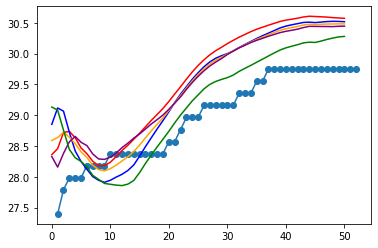

In [10]:
# Draw a sample configuration
ccc = df.sample(1).to_dict()
ccc = {k:list(ccc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
print(ccc)
plot_true_lc(ccc)
plot_lc_lcbench(ccc)

In [21]:
import torch
n = 4
alpha = torch.rand(n+1)
alpha[0] = 0.0
alpha[n] = 1.0
# alpha = torch.sort(alpha).values
# alpha[1:] - alpha[:n]
alpha

[0.0, 0.37800347805023193, 0.11817407608032227, 0.8052545785903931, 1.0]